In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [3]:
X, y = mnist["data"], mnist['target']

In [4]:
X.shape

(70000, 784)

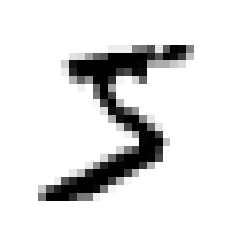

5


In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = X[0]
dm = digit.reshape(28,28)

plt.imshow(dm,cmap='binary')
plt.axis('off')
plt.show()
print(y[0])

In [14]:
import numpy as np
y = y.astype(np.uint8)

In [15]:
Nsplit = 60000
X_train, X_test, y_train, y_test = X[:Nsplit], X[Nsplit:], y[:Nsplit], y[Nsplit:]

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([digit])

array([ True])

In [28]:
p = sgd_clf.predict(X_test)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

Percent correct = 94.92%


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
y_train_pred.shape

(60000,)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [42]:
# Classifier precision
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print([prec,recall])

[0.8370879772350012, 0.6511713705958311]


In [45]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [47]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

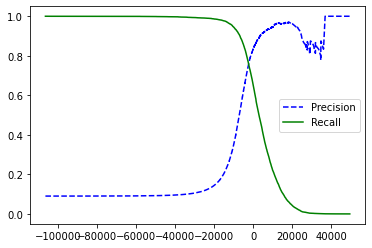

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-',label='Recall')
    plt.legend()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

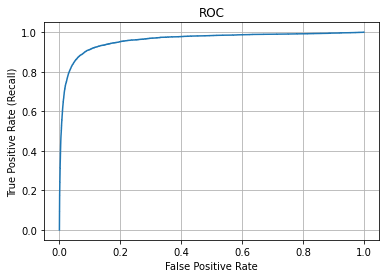

In [56]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.grid()